In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("winequality-red.csv", sep=",")

In [3]:
df.columns = [col.replace(".", "_") for col in df.columns]
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### EDA (Exploratory Data Analysis)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


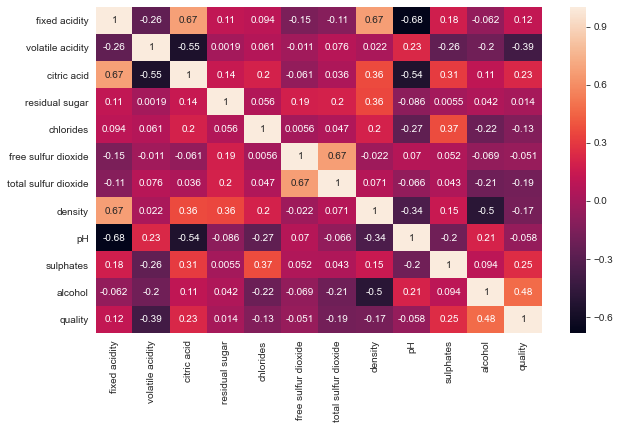

In [5]:
plt.figure(figsize=(10,6)) 
sns.heatmap(df.corr(), annot=True)
plt.show;

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

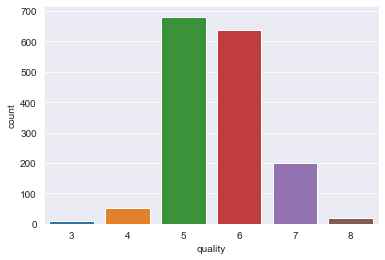

In [7]:
sns.countplot(df['quality'])

### Checking for outliers on the most relevant features for quality

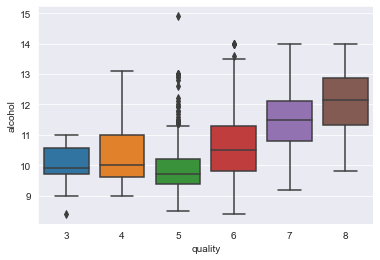

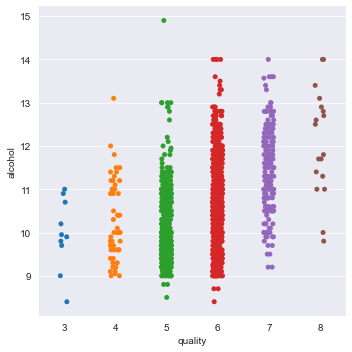

In [65]:
sns.boxplot('quality', 'alcohol', data = df)
sns.catplot(x="quality", y="alcohol", data=df)
plt.show()

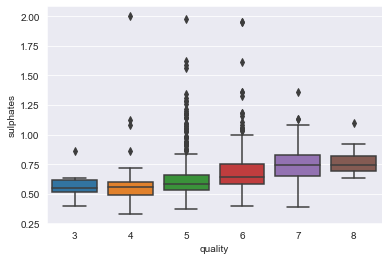

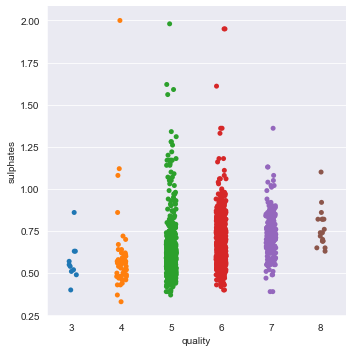

In [66]:
sns.boxplot('quality', 'sulphates', data = df)
sns.catplot(x="quality", y="sulphates", data=df)
plt.show()

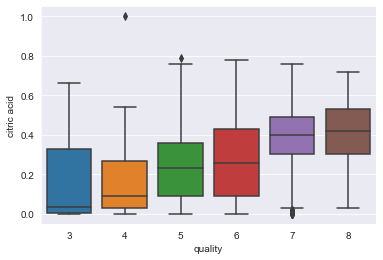

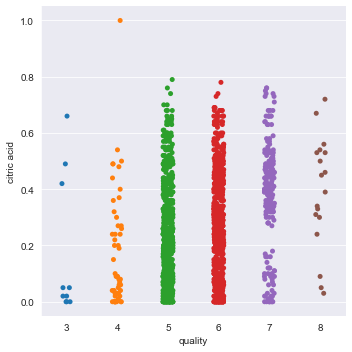

In [67]:
sns.boxplot('quality', 'citric acid', data = df)
sns.catplot(x="quality", y="citric acid", data=df)
plt.show()

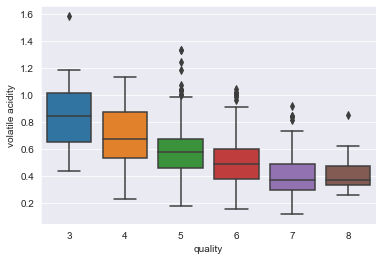

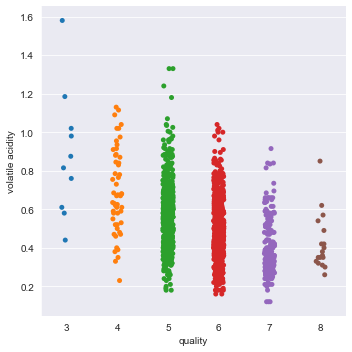

In [68]:
# volatile acidity has a negative correlation with quality of 39%
sns.boxplot('quality', 'volatile acidity', data = df)
sns.catplot(x="quality", y="volatile acidity", data=df)
plt.show()

In [8]:
quality = df["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")

In [9]:
#Create new data
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([df,category],axis=1)
data.drop(columns="quality",axis=1,inplace=True)

Mid     1319
Good     217
Bad       63
Name: category, dtype: int64

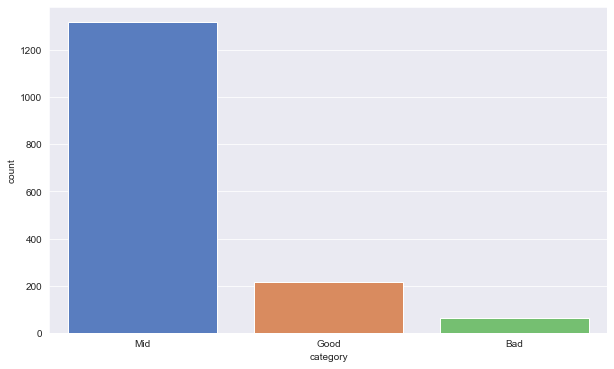

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data["category"],palette="muted")
data["category"].value_counts()

In [11]:
X = df.drop(['quality'],axis=1)
Y = df['quality']

In [12]:
from imblearn.over_sampling import SMOTE
os = SMOTE()
X_res, y_res = os.fit_sample(X, Y)

In [13]:
y_res.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

### Dataset Split (70% for train and 30% for test)

In [14]:
X_train, X_test, y_train, y_test= train_test_split(X_res, y_res, test_size=0.2, random_state=33)

### Normalizing data

In [15]:
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

### Standardizing data

In [16]:
# fit scaler on training data
stdscale = StandardScaler().fit(X_train)

# transform training data
X_train_std = stdscale.transform(X_train)

# transform testing dataabs
X_test_std = stdscale.transform(X_test)

### RandomForest Classifier Model with Normalized Data

In [69]:
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()

rf.fit(X_train_norm, y_train.ravel()) 

y_pred = rf.predict(X_test_norm)

print(accuracy_score(y_test, y_pred))

0.8679706601466992


### Confusion Matrix for RF with Normalized Data

In [71]:
rf_conf_matrix = confusion_matrix(y_test, y_pred)

print(rf_conf_matrix)

[[141   0   0   0   0   0]
 [  0 124   7   3   0   0]
 [  4  10  95  20   2   1]
 [  0   2  24  80  20   4]
 [  0   0   1   8 118   1]
 [  0   0   0   0   1 152]]


### RandomForest Classifier Model with Standardized Data

In [19]:
rf.fit(X_train_std, y_train)
y_pred1 = rf.predict(X_test_std)

print(accuracy_score(y_test, y_pred1))

0.871638141809291


### Confusion Matrix for RF with Standardized Data

In [20]:
rf_conf_matrix = confusion_matrix(y_test, y_pred1)

print(rf_conf_matrix)

[[141   0   0   0   0   0]
 [  0 126   7   1   0   0]
 [  2  12  97  18   2   1]
 [  0   4  22  84  14   6]
 [  1   0   1  11 112   3]
 [  0   0   0   0   0 153]]


### CatBoost with Normalized Data

In [73]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(random_state=33, verbose=False)

cbc.fit(X_train_norm, y_train)

y_pred2 = cbc.predict(X_test_norm)

print(accuracy_score(y_test, y_pred2))

0.8728606356968215


### Confusion Matrix for CB with Normalized Data

In [22]:
rf_conf_matrix = confusion_matrix(y_test, y_pred2)

print(rf_conf_matrix)

[[141   0   0   0   0   0]
 [  0 128   3   3   0   0]
 [  2   9  94  25   1   1]
 [  0   3  22  81  18   6]
 [  0   0   1   6 117   4]
 [  0   0   0   0   0 153]]


### CatBoost with Standardized Data

In [23]:
cbc.fit(X_train_std, y_train)

y_pred3 = cbc.predict(X_test_std)

print(accuracy_score(y_test, y_pred3))

0.8728606356968215


### Confusion Matrix for CB with Standardized Data

In [24]:
rf_conf_matrix = confusion_matrix(y_test, y_pred3)

print(rf_conf_matrix)

[[141   0   0   0   0   0]
 [  0 127   5   2   0   0]
 [  2  10  95  22   2   1]
 [  0   3  22  81  18   6]
 [  0   0   2   5 117   4]
 [  0   0   0   0   0 153]]


### Now we are going to unite the two models and see the metrics with normalized and standardized data

#### CB + RF with Normalized data

In [25]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[('Random Forest', rf), ('Catboost', cbc)], voting='soft', n_jobs=-1)
votingC = votingC.fit(X_train_norm, y_train)
# Predict the labels of the test set
y_pred4 = votingC.predict(X_test_norm)
# Evaluate the accuracy of clf on the test set
accuracy_score(y_test, y_pred4)

0.8740831295843521

#### Confusion Matrix CB + RF with Normalized data

In [26]:
rf_conf_matrix = confusion_matrix(y_test, y_pred4)

print(rf_conf_matrix)

[[141   0   0   0   0   0]
 [  0 127   5   2   0   0]
 [  2  10  94  24   1   1]
 [  0   3  23  81  17   6]
 [  0   0   1   6 119   2]
 [  0   0   0   0   0 153]]


#### CB + RF with Normalized data

In [27]:
from sklearn.ensemble import VotingClassifier
votingC = VotingClassifier(estimators=[('Random Forest', rf), ('Catboost', cbc)], voting='soft', n_jobs=-1)
votingC = votingC.fit(X_train_std, y_train)

y_pred5 = votingC.predict(X_test_std)

accuracy_score(y_test, y_pred5)

0.8679706601466992

#### Confusion Matrix CB + RF with Normalized data

In [28]:
rf_conf_matrix = confusion_matrix(y_test, y_pred5)
print(rf_conf_matrix)

[[141   0   0   0   0   0]
 [  0 127   6   1   0   0]
 [  2  10  94  23   2   1]
 [  0   3  22  80  19   6]
 [  0   0   2   8 115   3]
 [  0   0   0   0   0 153]]


### Conclusion

#### As we can see, the model with the highest accuracy (87.41%) was Random Forest with Cat booster, for standardized data.
#### Was notice the importance of data standardization / normalization before applying a classification model,especially when many outliers are found.